In [1]:
from typing import Callable

import torch
import numpy
import matplotlib.pyplot as plt

from utilities import CostParameters, least_square_cost, ridge_cost

In [2]:
torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    torch.set_default_device("cuda")

In [3]:
TEST_DATA_SIZE = 100
X = numpy.sort(numpy.random.rand(TEST_DATA_SIZE, 1), axis=0)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)
Z = numpy.random.rand(TEST_DATA_SIZE, 1)

In [4]:
input_layer = 2
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, cost_func: Callable[[CostParameters], torch.Tensor], print_debug_info: bool = False) -> None:
    x_tensor = torch.tensor(numpy.concatenate((X, Y), axis=1))
    y_tensor = torch.tensor(Z)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True)
    biases_layer2 = torch.rand(output_layer, requires_grad=True)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()

        cost_params = CostParameters(y_tensor, predicted, [weights_layer1, weights_layer2], [biases_layer1, biases_layer2])
        loss = cost_func(cost_params)

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    sub_plot = plt.figure().add_subplot(projection="3d")
    sub_plot.set_title(f"Training a 3D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")

    sub_plot.plot_trisurf(X.reshape(TEST_DATA_SIZE), Y.reshape(TEST_DATA_SIZE), final_prediction.reshape(TEST_DATA_SIZE), color="g", alpha=0.6)
    sub_plot.scatter(X, Y, Z)
    plt.show()

Info at epoch #500:
Loss: 9.618432988700269
Info at epoch #1000:
Loss: 8.894304860845194
Info at epoch #1500:
Loss: 8.786716638490397
Info at epoch #2000:
Loss: 8.71546087394187
Info at epoch #2500:
Loss: 8.654055333025767
Info at epoch #3000:
Loss: 8.60000985699402
Info at epoch #3500:
Loss: 8.552196669049282
Info at epoch #4000:
Loss: 8.509730137871163
Info at epoch #4500:
Loss: 8.471876677221934
Info at epoch #5000:
Loss: 8.438023080392668


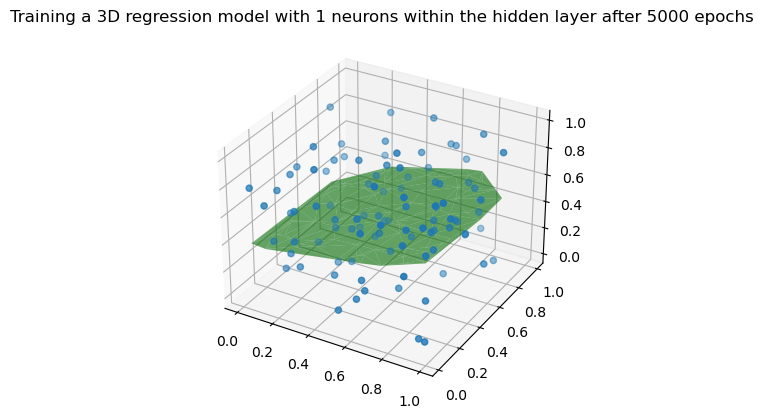

Info at epoch #500:
Loss: 9.699066207451677
Info at epoch #1000:
Loss: 9.299122420212274
Info at epoch #1500:
Loss: 8.996944165278924
Info at epoch #2000:
Loss: 8.767510444762546
Info at epoch #2500:
Loss: 8.592721850156536
Info at epoch #3000:
Loss: 8.459265255049477
Info at epoch #3500:
Loss: 8.357223048888741
Info at epoch #4000:
Loss: 8.279137024580862
Info at epoch #4500:
Loss: 8.219359853919585
Info at epoch #5000:
Loss: 8.173594576025929


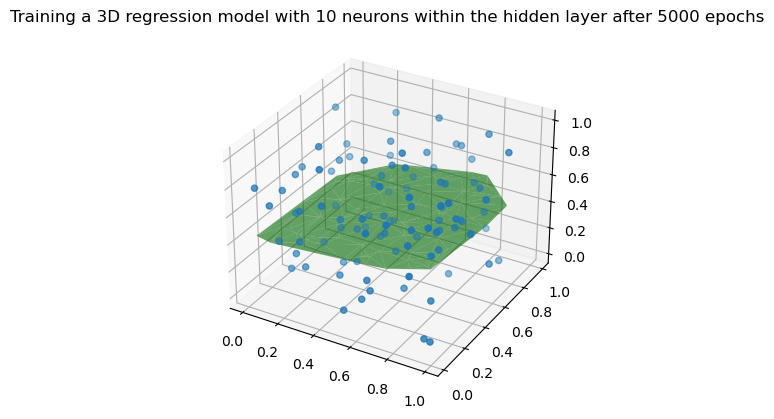

Info at epoch #500:
Loss: 15.538805715797995
Info at epoch #1000:
Loss: 8.692953447753275
Info at epoch #1500:
Loss: 8.084475740851897
Info at epoch #2000:
Loss: 8.030188222571939
Info at epoch #2500:
Loss: 8.025344578475114
Info at epoch #3000:
Loss: 8.02491245585499
Info at epoch #3500:
Loss: 8.024873905656406
Info at epoch #4000:
Loss: 8.02487046658416
Info at epoch #4500:
Loss: 8.024870159784802
Info at epoch #5000:
Loss: 8.024870132415284


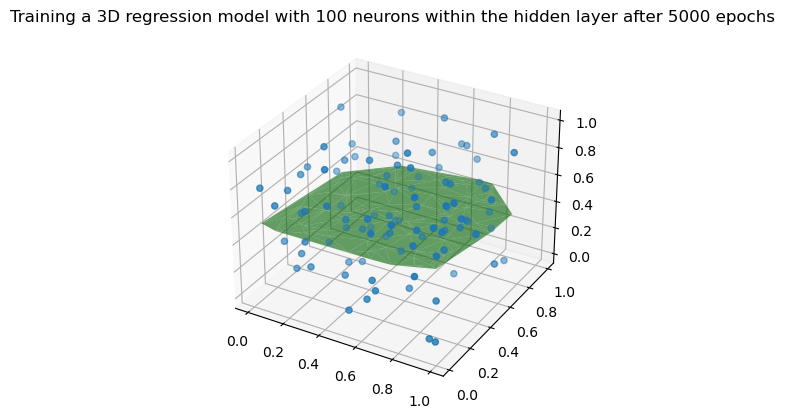

In [5]:
train(1, 5_000, least_square_cost, print_debug_info=True)
train(10, 5_000, least_square_cost, print_debug_info=True)
train(100, 5_000, least_square_cost, print_debug_info=True)


Info at epoch #500:
Loss: 9.866074100371431
Info at epoch #1000:
Loss: 9.702906704597206
Info at epoch #1500:
Loss: 9.56430222738354
Info at epoch #2000:
Loss: 9.443881085803
Info at epoch #2500:
Loss: 9.338652851581095
Info at epoch #3000:
Loss: 9.246243463650366
Info at epoch #3500:
Loss: 9.16472930399578
Info at epoch #4000:
Loss: 9.092537251938278
Info at epoch #4500:
Loss: 9.028370119971646
Info at epoch #5000:
Loss: 8.971150027232063


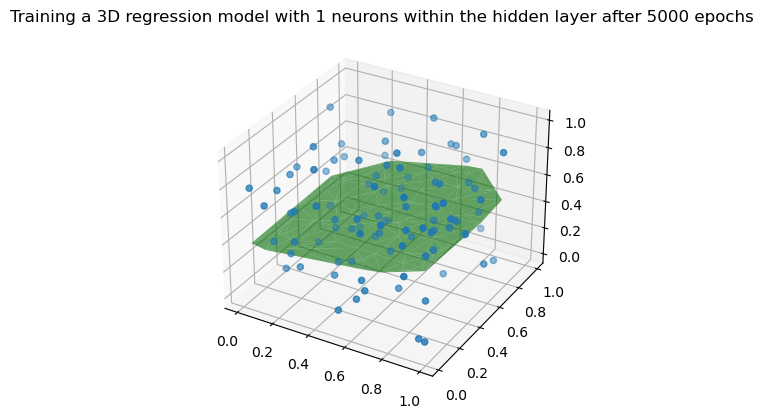

Info at epoch #500:
Loss: 12.741421337872714
Info at epoch #1000:
Loss: 11.864013542875341
Info at epoch #1500:
Loss: 11.229860081386047
Info at epoch #2000:
Loss: 10.765062918778767
Info at epoch #2500:
Loss: 10.420774849840356
Info at epoch #3000:
Loss: 10.163660382425116
Info at epoch #3500:
Loss: 9.970396213820901
Info at epoch #4000:
Loss: 9.824343328186822
Info at epoch #4500:
Loss: 9.713450597370612
Info at epoch #5000:
Loss: 9.628887362669877


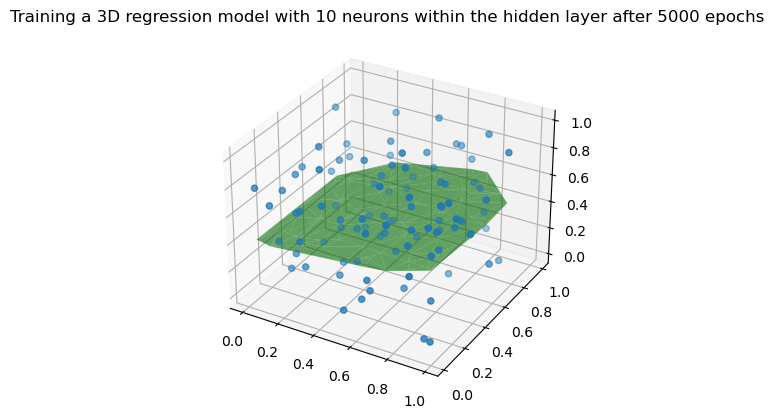

Info at epoch #500:
Loss: 18.849146133797298
Info at epoch #1000:
Loss: 13.642447125099439
Info at epoch #1500:
Loss: 13.303404004247346
Info at epoch #2000:
Loss: 13.278436171160994
Info at epoch #2500:
Loss: 13.27441644126735
Info at epoch #3000:
Loss: 13.271813055150009
Info at epoch #3500:
Loss: 13.269306080475836
Info at epoch #4000:
Loss: 13.266805696046195
Info at epoch #4500:
Loss: 13.264305763677587
Info at epoch #5000:
Loss: 13.261805862586606


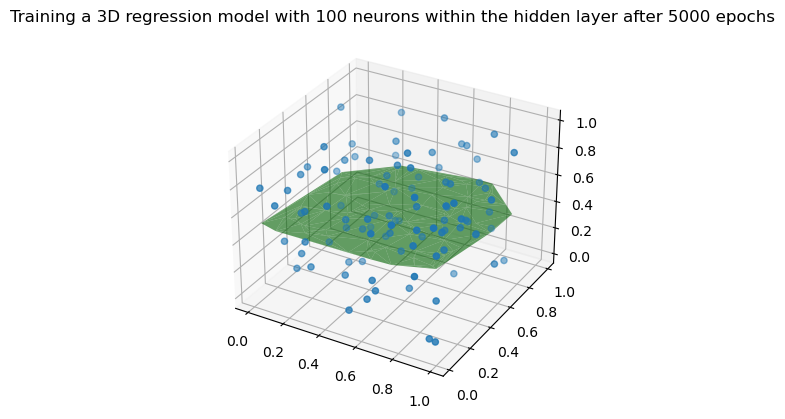

In [6]:
train(1, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(10, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(100, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)